In [1]:
import pandas as pd

df= pd.read_csv("df_sell_final.csv")
df = df.drop(['Unnamed: 0', 'wm_yr_wk_shift', 'd_num', 'd_shift'], axis =1)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df_count = pd.read_csv("df_sell_count.csv")

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,0.00,0.0,0.00,0.00,0.00,0.00,0.00,24.00,4.00,...,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0
1,2011-01-30,0.00,0.0,0.00,0.00,0.00,0.00,0.00,30.00,0.00,...,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0
2,2011-01-31,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14.00,...,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0
3,2011-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,...,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0
4,2011-02-02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,...,5,2016,d_1937,No_Event,No_Event,No_Event,No_Event,0,0,0
1937,2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,...,5,2016,d_1938,No_Event,No_Event,No_Event,No_Event,0,0,0
1938,2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,...,5,2016,d_1939,No_Event,No_Event,No_Event,No_Event,0,0,0
1939,2016-05-21,0.00,0.0,0.00,4.48,2.24,4.48,2.24,89.60,2.24,...,5,2016,d_1940,No_Event,No_Event,No_Event,No_Event,0,0,0


In [4]:
single_df_linear = df.reset_index()
single_df_linear

single_df_linear = df.groupby(['event_name_1'])['d'].count()
event_name_list = pd.DataFrame()
event_name_list['event'] = single_df_linear.index

In [5]:
event_name_list

,event
0,Chanukah End
1,Christmas
2,Cinco De Mayo
3,ColumbusDay
4,Easter
5,Eid al-Fitr
6,EidAlAdha
7,Father's day
8,Halloween
9,IndependenceDay


In [6]:
single_df_linear = df.groupby(['event_type_1'])['d'].count().to_frame('event type')
event_type_list = pd.DataFrame()
event_type_list['event_type'] = single_df_linear.index
event_type_list

,event_type
0,Cultural
1,National
2,No_Event
3,Religious
4,Sporting


In [7]:
single_df_linear = df.groupby(['weekday'])['d'].count().to_frame('Week days')
weekday_list = pd.DataFrame()
weekday_list['weekday'] = single_df_linear.index
weekday_list

,weekday
0,Friday
1,Monday
2,Saturday
3,Sunday
4,Thursday
5,Tuesday
6,Wednesday


In [8]:
import numpy as np
df['event_name_1_index'] = 0
df['event_name_2_index'] = 0
df['event_type_1_index'] = 0
df['event_type_2_index'] = 0
df['weekday_index'] = 0

df['event_name_1_index'] = df.apply(lambda x: (np.where(x['event_name_1'] == event_name_list['event'])[0][0]), axis =1)
df['event_name_2_index'] = df.apply(lambda x: (np.where(x['event_name_2'] == event_name_list['event'])[0][0]), axis =1)
df['event_type_1_index'] = df.apply(lambda x: (np.where(x['event_type_1'] == event_type_list['event_type'])[0][0]), axis =1)
df['event_type_2_index'] = df.apply(lambda x: (np.where(x['event_type_2'] == event_type_list['event_type'])[0][0]), axis =1)
df['weekday_index'] = df.apply(lambda x: (np.where(x['weekday'] == weekday_list['weekday'])[0][0]), axis =1)

In [9]:
df.tail()

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,event_name_1_index,event_name_2_index,event_type_1_index,event_type_2_index,weekday_index
1936,2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,...,No_Event,No_Event,0,0,0,19,19,2,2,6
1937,2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,...,No_Event,No_Event,0,0,0,19,19,2,2,4
1938,2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,...,No_Event,No_Event,0,0,0,19,19,2,2,0
1939,2016-05-21,0.00,0.0,0.00,4.48,2.24,4.48,2.24,89.60,2.24,...,No_Event,No_Event,0,0,0,19,19,2,2,2
1940,2016-05-22,2.24,0.0,2.24,13.44,0.00,0.00,0.00,71.68,0.00,...,No_Event,No_Event,0,0,0,19,19,2,2,3


In [10]:
df = df.drop(['weekday','d','event_name_1','event_type_1','event_name_2','event_type_2'], axis =1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Columns: 30503 entries, date to weekday_index
dtypes: datetime64[ns](1), float64(30490), int64(12)
memory usage: 451.7 MB


Test to show with multiple items in 1 time serires graph

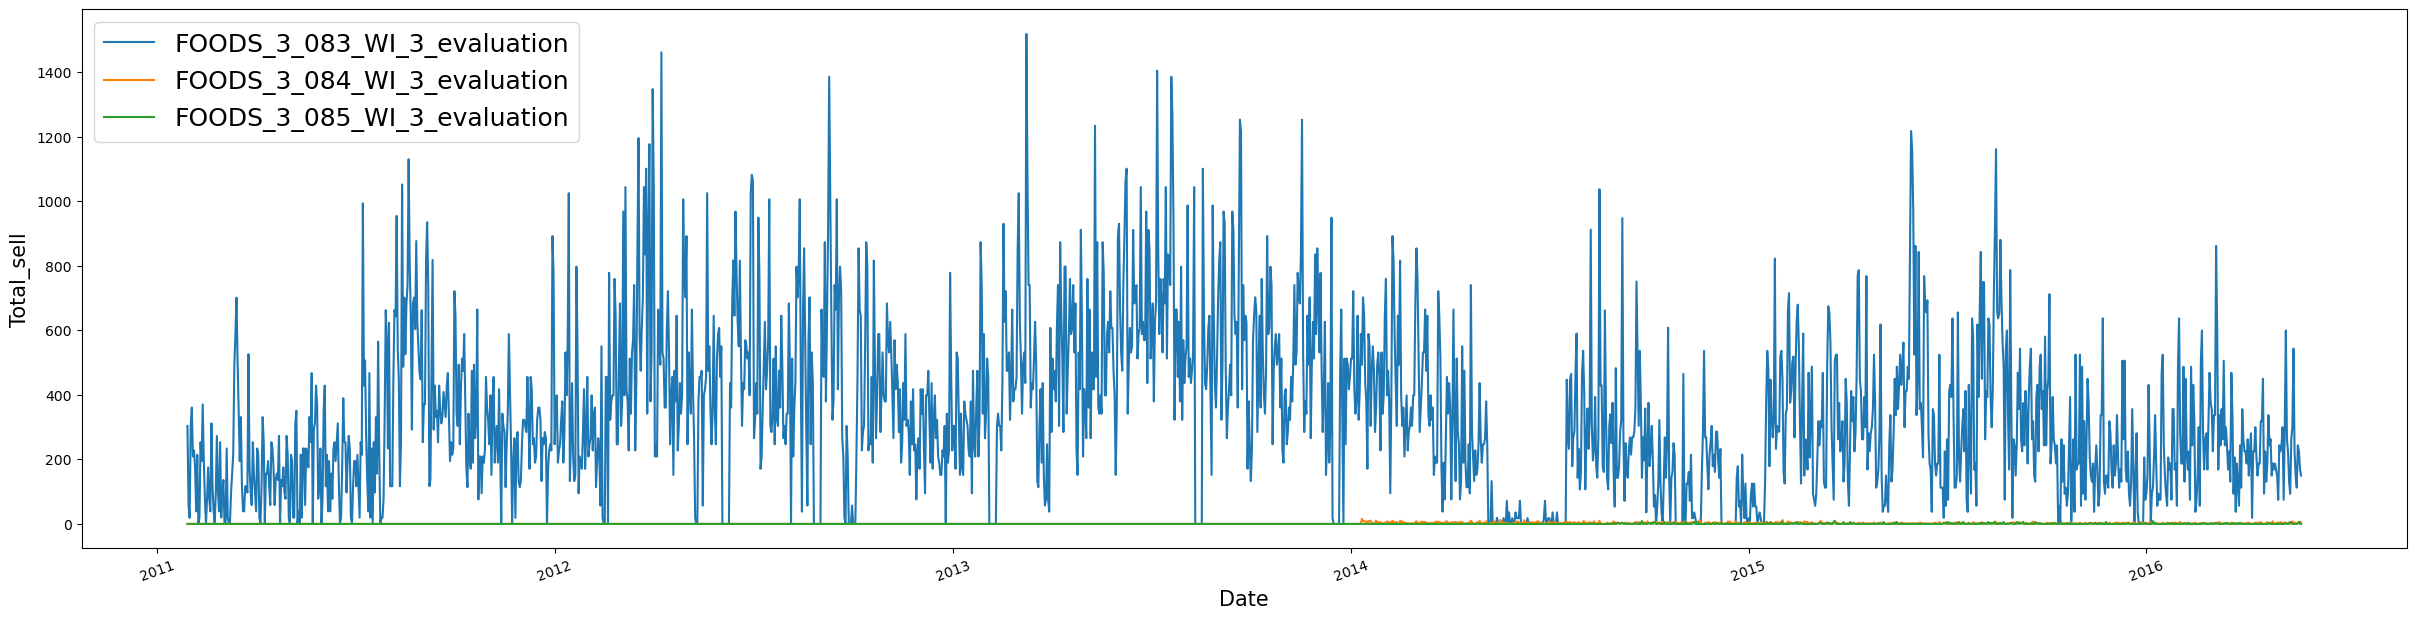

In [12]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

dim = (30,7)
plt.subplots(figsize = dim)

for item in multi_items:
    plt.plot(df['date'], df[item], label = item)
plt.legend(multi_items, prop ={'size':18})
plt.xticks (rotation = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total_sell', fontsize = 15)
plt.show()

In [13]:
df_test1 = df.copy()
df_test1 = df_test1.set_index('date')

Smoothing the line

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


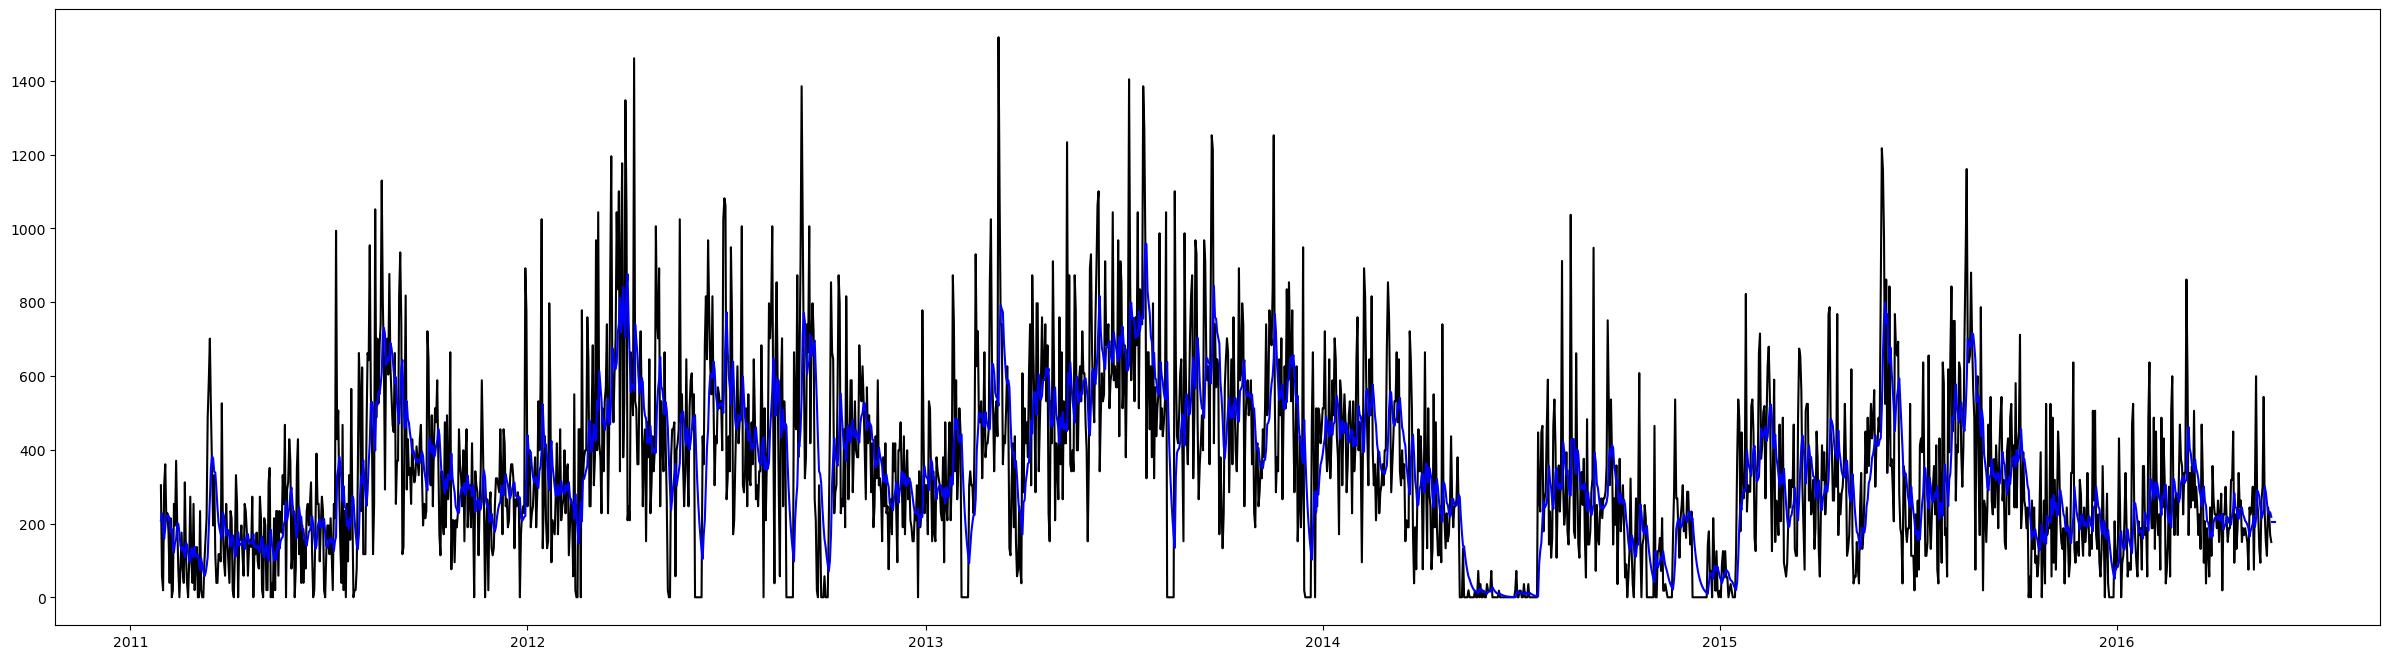

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt



fit1 = SimpleExpSmoothing(df_test1['FOODS_3_083_WI_3_evaluation'], initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(df_test1['FOODS_3_083_WI_3_evaluation'], initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(df_test1['FOODS_3_083_WI_3_evaluation'], initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(30, 8))
plt.plot(df_test1['FOODS_3_083_WI_3_evaluation'], color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
# plt.plot(fit2.fittedvalues, color="red")
# (line2,) = plt.plot(fcast2, color="red")
# plt.plot(fit3.fittedvalues, color="green")
# (line3,) = plt.plot(fcast3, color="green")
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

Testing with short term

In [15]:
df_test = df.copy()
df_test = df_test.set_index('date')
df_test = df_test.loc['2016/04/01':,:]

In [16]:
WI = []
TX = []
CA = []
items = []
calender = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

create a list with all the stores

In [17]:
for col in df_test.columns:
    
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

In [18]:
eva_item =  "FOODS_3_083_WI_3_evaluation"
eva_df = df_test.loc[:,eva_item]

In [19]:
train = eva_df['2016/04/01':'2016/05/15']
test = eva_df['2016/05/16':]

In [20]:
test

date
2016-05-16    224.76
2016-05-17    149.84
2016-05-18    112.38
2016-05-19    243.49
2016-05-20    224.76
2016-05-21    168.57
2016-05-22    149.84
Name: FOODS_3_083_WI_3_evaluation, dtype: float64

Use autoarima

In [21]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.076 seconds


In [22]:
prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
prediction

2016-05-16    228.506
2016-05-17    228.506
2016-05-18    228.506
2016-05-19    228.506
2016-05-20    228.506
2016-05-21    228.506
2016-05-22    228.506
Freq: D, dtype: float64

In [23]:
def APE(Y_actual, Y_Predicted):
    ape = (np.abs(Y_actual - Y_Predicted)/np.abs(Y_actual))*100
    return ape

In [24]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(APE(Y_actual, Y_Predicted))
    return mape

In [25]:
APE_df = pd.DataFrame(columns =['APE'])
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
APE_df['APE'] = APE(test, prediction)
MAPE_df.loc[1] =[eva_item, MAPE(test, prediction)]

In [26]:
APE_df

,APE
date,
2016-05-16,1.666667
2016-05-17,52.500000
2016-05-18,103.333333
2016-05-19,6.153846
2016-05-20,1.666667
2016-05-21,35.555556
2016-05-22,52.500000


In [27]:
cf= pd.DataFrame(confint)

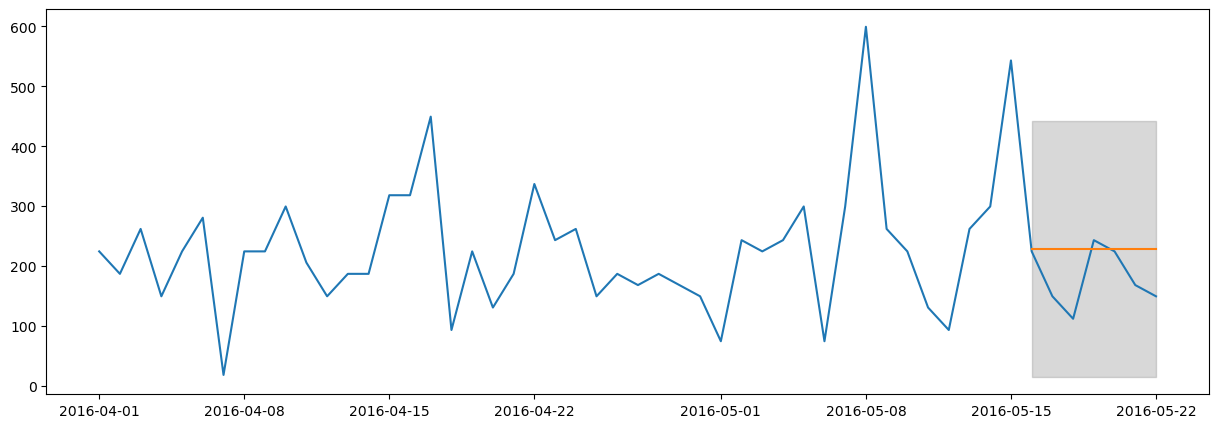

In [28]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(eva_df)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [29]:
def add_to_table(table, name, extra_name, data, joining_indices):
    split_name = name.split("_")
    selected_elements = [split_name[idx] for idx in joining_indices]
    id_name = "_".join(selected_elements)
    id_name = id_name + extra_name
    
    if id_name in table:
        table[id_name] = table[id_name] + data
    else:
        table[id_name] = data

In [30]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc[:,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/16':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    #Add APE to the table
    APE_df[item] = APE(test_df[item], prediction)
    #add MAPE to the table with item ID
    MAPE_df.loc[index_counter] =[item, MAPE(test_df[item], prediction)]
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.056 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=200.754, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=202.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.880, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=238.225, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.066 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.511, Time=0.00 sec
 ARIMA

In [31]:
MAPE_df

,id,MAPE
0,FOODS_3_083_WI_3_evaluation,36.196581
1,FOODS_3_084_WI_3_evaluation,inf
2,FOODS_3_085_WI_3_evaluation,inf


In [32]:
APE_df

,FOODS_3_083_WI_3_evaluation,FOODS_3_084_WI_3_evaluation,FOODS_3_085_WI_3_evaluation
date,,,
2016-05-16,1.666667,35.555556,inf
2016-05-17,52.500000,inf,inf
2016-05-18,103.333333,inf,inf
2016-05-19,6.153846,35.555556,86.797490
2016-05-20,1.666667,35.555556,93.398745
2016-05-21,35.555556,57.037037,inf
2016-05-22,52.500000,35.555556,inf


In [33]:
evaluating_data

,WI_3_predict,WI_3_FOODS_3_predict,WI_3,WI_3_FOODS_3
2016-05-16,231.404279,231.404279,228.72,228.72
2016-05-17,231.451435,231.451435,149.84,149.84
2016-05-18,231.451435,231.451435,112.38,112.38
2016-05-19,231.451435,231.451435,250.43,250.43
2016-05-20,231.451435,231.451435,234.68,234.68
2016-05-21,231.451435,231.451435,174.51,174.51
2016-05-22,231.451435,231.451435,153.80,153.80


In [34]:
predicted_item

,FOODS_3_083_WI_3_evaluation,FOODS_3_084_WI_3_evaluation,FOODS_3_085_WI_3_evaluation
2016-05-16,228.506,2.552,0.346279
2016-05-17,228.506,2.552,0.393435
2016-05-18,228.506,2.552,0.393435
2016-05-19,228.506,2.552,0.393435
2016-05-20,228.506,2.552,0.393435
2016-05-21,228.506,2.552,0.393435
2016-05-22,228.506,2.552,0.393435


In [35]:
df_test2.head(5)

,FOODS_3_083_WI_3_evaluation,FOODS_3_084_WI_3_evaluation,FOODS_3_085_WI_3_evaluation,actual_total,predicted_total
date,,,,,
2016-04-01,224.76,0.00,0.0,224.76,NaN
2016-04-02,187.30,1.98,0.0,189.28,NaN
2016-04-03,262.22,3.96,0.0,266.18,NaN
2016-04-04,149.84,3.96,0.0,153.80,NaN
2016-04-05,224.76,1.98,0.0,226.74,NaN


There are zero values which is interferring with the calculation

In [36]:
def MAE(Y_actual, Y_Predicted):
    mae = np.mean(np.abs(Y_actual - Y_Predicted))
    return mae

In [37]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc[:,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/01':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
#Add items to the id

MAPE_MAE_df['id'] = multi_items
for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    
    #Add APE to the table
    #APE_df[item] = APE(test_df[item], prediction)
    
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df[item] == 0.0):
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.054 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=200.754, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=202.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.880, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=238.225, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.058 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.511, Time=0.00 sec
 ARIMA

In [38]:
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
MAPE_MAE_df['id'] = multi_items

In [39]:
MAPE_MAE_df

,id,error,MAE or MAPE
0,FOODS_3_083_WI_3_evaluation,NaN,NaN
1,FOODS_3_084_WI_3_evaluation,NaN,NaN
2,FOODS_3_085_WI_3_evaluation,NaN,NaN


Now try with 100 items and longer time frame

In [40]:
import random
#Cerate a list of items from current table
items = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            items.append(col)

#Select random items from the list of total items
#Number of random values
n_random = 100
random_item = random.sample(items, n_random)

df_test2 = df_test.copy()

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2015/04/01':'2016/04/21']
test_df = df_test2['2016/04/22':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in random_item:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    
    #Add APE to the table
    #APE_df[item] = APE(test_df[item], prediction)
    
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df[item] == 0.0):
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=119.436, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.307, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=119.204, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.819, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=116.091, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=118.070, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=118.083, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=117.386, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=116.599, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=119.381, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.139 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=145.147, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=147.024, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=147.042, Time=0

C:\Users\yohei\anaconda3\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=51.731, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=49.518, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=51.518, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=51.518, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=51.017, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.159 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=80.123, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=82.068, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=82.061, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=79.148, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.054 seconds
Performing stepwise search to minimize aic
 

C:\Users\yohei\anaconda3\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=180.933, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=180.708, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=236.552, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=181.977, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.044 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=106.514, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.506, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108.505, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107.752, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=110.461, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.029 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.656, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.386, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=117

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=105.202, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=106.424, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=106.749, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107.117, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=107.443, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.045 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=176.790, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=178.105, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=177.922, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=189.043, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=179.741, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.042 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33.156, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=31.1

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114.052, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=115.485, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=115.187, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=121.095, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.047 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=110.632, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.206, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112.289, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=119.248, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=114.174, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.030 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=109.754, Time=0.00 sec
 ARIMA

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=23.018, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.186 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3.609, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5.131, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4.748, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.461, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.066 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=72.534, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=74.530, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=74.531, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=82.286, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=76.503, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=128.551, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=128.578, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.297, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=130.461, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.042 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=107.330, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=102.929, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=105.388, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=102.575, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=104.572, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=104.573, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=106.529, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=120.729, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=122.728, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=122.728, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.422, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=124.727, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.032 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=113.307, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.319, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112.099, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=123.059, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=113.828, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=112.501, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=113.010, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=118.363, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=173.196, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=175.195, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=175.263, Time=0.00 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.083 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101.397, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=103.153, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=103.123, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.289, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=104.865, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.034 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=173.977, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=175.834, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=175.782, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=183

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=66.662, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.083 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53.647, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55.169, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55.300, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54.499, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=56.727, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.032 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-442.947, Time=0.01 sec
Total fit time: 0.006 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=162.033, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=154.084, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]     

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125.919, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.374, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.059 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=43.063, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45.008, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=45.000, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=42.088, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.058 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83.842, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=85.811, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=85.789, Time=0.01 sec

C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data
C:\Users\yohei\AppData\Local\Temp\ipykernel_23056\4235443811.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[id_name] = data


ValueError: operands could not be broadcast together with shapes (31,) (7,) 

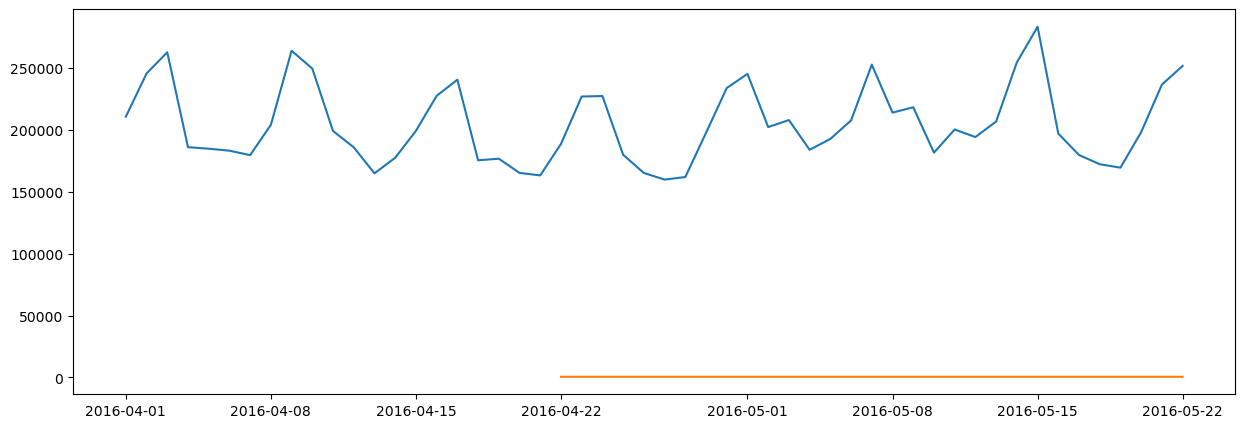

In [41]:
prediction_series = pd.Series(df_test2['predicted_total'],index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_test2['actual_total'])
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [ ]:
#Cerate a list of items from current table
items = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            items.append(col)
            
df_test2 = df_test.copy()

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/16':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    #Add APE to the table
    APE_df[item] = APE(test_df[item], prediction)
    #add MAPE to the table with item ID
    MAPE_df.loc[index_counter] =[item, MAPE(test_df[item], prediction)]
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    
    


In [ ]:
!jt -r 

In [ ]:
MAPE_df['MAPE'].nlargest(n=10)

Need to remove 0 values

exponentional
Wavelet denoising
MAE or MAPE in each loop

Start with 100 items not all estimate the time
output csv file of MAP or MAPE with whole predicted values to read to next table

Now try with longer period

In [ ]:
#Cerate a list of items from current table
items = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            items.append(col)
            
df_test3 = df_test.copy()

df_test3['actual_total'] = 0
df_test3['predicted_total'] = 0
for item in items:
    df_test3['actual_total'] = df_test3['actual_total'] + df_test2[item]

train_df = df_test3['2015/01/01':'2016/05/01']
test_df = df_test3['2016/05/02':]

#Create a actual value dataframe and predicted value data frame
y1_predicted_item = pd.DataFrame()
index_counter = 0
y1_APE_df = pd.DataFrame()
y1_MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
y1_evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test3['predicted_total'] = df_test3['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    y1_predicted_item[item] = prediction
    #Add APE to the table
    y1_APE_df[item] = APE(test_df[item], prediction)
    #add MAPE to the table with item ID
    y1_MAPE_df.loc[index_counter] =[item, MAPE(test_df[item], prediction)]
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(y1_evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(y1_evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(y1_evaluating_data,item,'', test, joining_indices_store)
    add_to_table(y1_evaluating_data,item,'', test, joining_indices_item) 


In [ ]:
c = df_test.loc['2015/01/01':'2016/01/01','FOODS_1_001_CA_2_evaluation']

In [ ]:
c

In [ ]:
c

In [ ]:

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'CA'):
            items.append(col)